In [1]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.lines as mlines
from tueplots import cycler, markers
from tueplots.constants import markers as marker_constants
from tueplots.constants.color import palettes
from tueplots import figsizes, fonts
#Colours
cmap_color = plt.cm.get_cmap('Pastel1')
cdot_color = plt.cm.get_cmap('tab20')

/tmp/ipykernel_5982/1039141050.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_color = plt.cm.get_cmap('Pastel1')
/tmp/ipykernel_5982/1039141050.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cdot_color = plt.cm.get_cmap('tab20')


In [2]:
stations = pd.read_csv("../project/data/dwd/stations.tsv", sep="\t")

#remove stations with empty Beginn or Ende
mask = stations["Beginn"] == " "
stations = stations[~mask]
mask = stations["Ende"] == " "
stations = stations[~mask]

stations["Beginn"] = pd.to_datetime(stations["Beginn"], dayfirst=True)
stations["Ende"] = pd.to_datetime(stations["Ende"], dayfirst=True)

stations.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende
0,Aach,1,KL,02783,47.8410,8.8490,478,,BW,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,,BW,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,,BW,1951-02-27,2000-06-15
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100,NW,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100,NW,1937-01-01,2011-03-31


In [3]:
from datetime import datetime
bw_stations = stations.loc[stations["Bundesland"] == "BW"].drop_duplicates(subset= ["Stationsname", "Stations-kennung"])

current_bw_stations = bw_stations[bw_stations["Ende"] >= datetime(day=2, month=12, year=2023)]
id_str = current_bw_stations["Stations-kennung"].to_string(index=False).replace("\n ", ",")

In [4]:
# bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(response_ids)]
a = ["Q771",  "Q411",  "Q740",  "Q055",  "Q811",  "Q824",  "Q382",  "Q712",  "Q702",  "Q221",  "Q978",  "Q848",  "Q351",  "Q651",  "Q485",  "Q292",  "Q579",  "Q887",  "Q671",  "Q437",  "Q061",  "Q242",  "Q518",  "Q332",  "Q864",  "Q440",  "Q404",  "Q733",  "Q341",  "Q378",  "Q788",  "Q942",  "Q738",  "Q879",  "Q622",  "Q926"]
bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(a)]

In [42]:
bw_response_stations["Stations_ID"].values

array([ 4189,   257, 13965,   755,   757,  5688,  1197,  1214,  1224,
        1255,  6258,  1584,  6259,  2074,  7331,  2575,  2814,   259,
        3402,  5562,  6275,  3734,  1602,  3925,  3927,  4160,  4169,
        4300,  4349,  6262,  4703,  6263,  5229,  4094,  5664,  5731])

In [6]:
current_directory = os.curdir
# www.suche-postleitzahl.org/downloads 
filepath_plz = r'../data/map/'
#Create map of germany 
plz_shape_df = gpd.read_file(os.path.join(filepath_plz,'plz-5stellig.shp'), dtype={'plz': str})
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df.head()

,plz,note,einwohner,qkm,geometry
0,64743,"Situation unklar, evtl. haben die HÃ¤user Marb...",3,0.082066,"POLYGON ((8.98124 49.60761, 8.98312 49.60748, ..."
1,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780..."
2,60315,60315 Frankfurt am Main (FOUR),0,0.017285,"POLYGON ((8.67254 50.11264, 8.67258 50.11265, ..."
3,99331,99331 Geratal,4523,20.207080,"POLYGON ((10.79153 50.69477, 10.79178 50.69819..."
4,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67311 50.11182, ..."


In [7]:
#Create dict of the stations and their long lat
col_to_conv_to_dict = bw_response_stations[['Länge', 'Breite', 'Stationsname']]
stations_dict = col_to_conv_to_dict.set_index('Stationsname').apply(tuple, axis=1).to_dict()
tuebingen = {'Tübingen':(9.057645, 48.521637)}
stations_dict.update(tuebingen)

In [8]:

# Assuming bw_response_stations is a DataFrame containing 'Länge', 'Breite', and 'Stationsname'
# Create dict of the stations and their long lat
col_to_conv_to_dict = bw_response_stations[['Länge', 'Breite', 'Stationsname']]
stations_dict = col_to_conv_to_dict.set_index('Stationsname').apply(tuple, axis=1).to_dict()

# Add Tübingen to the dictionary
tuebingen = {'Tübingen': (9.057645, 48.521637)}
stations_dict.update(tuebingen)
# Print the updated dictionary
print(stations_dict)


{'Altheim, Kreis Biberach': (9.46, 48.148), 'Baden-Baden-Geroldsau': (8.246, 48.727), 'Balingen-Bronnhaupten': (8.813, 48.264), 'Buchen, Kr. Neckar-Odenwald': (9.321, 49.518), 'Buchenbach': (7.998, 47.963), 'Dachsberg-Wolpadingen': (8.106, 47.7), 'Ellwangen-Rindelbach': (10.131, 48.99), 'Elzach-Fisnacht': (8.109, 48.201), 'Emmendingen-Mundingen': (7.835, 48.138), 'Eppingen-Elsenz': (8.848, 49.166), 'Friedrichshafen-Unterraderach': (9.441, 47.685), 'Geisingen': (8.647, 47.924), 'Großerlach-Mannenweiler': (9.603, 49.021), 'Hechingen': (8.98, 48.375), 'Hermaringen-Allewind': (10.267, 48.61), 'Kirchberg/Jagst-Herboldshausen': (9.98, 49.18), 'Merklingen': (9.764, 48.512), 'Müllheim': (7.639, 47.806), 'Münsingen-Apfelstetten': (9.484, 48.385), 'Neubulach-Oberhaugstett': (8.68, 48.652), 'Notzingen': (9.463, 48.671), 'Obersulm-Willsbach': (9.353, 49.128), 'Ohlsbach': (7.993, 48.433), 'Pforzheim-Ispringen': (8.697, 48.933), 'Pfullendorf': (9.287, 47.935), 'Renningen-Ihinger Hof': (8.924, 48.743

In [9]:
plz_region_df = pd.read_csv(
    '../data/map/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)
plz_region_df.drop('osm_id', axis=1, inplace=True)

# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

bawu_df = germany_df[germany_df['bundesland']== 'Baden-Württemberg']
print(bawu_df.head())

       plz  einwohner         qkm  \
546  74744       2221   53.882924   
547  74736       6910   87.002504   
548  74749       2090   40.883933   
550  74731      11320  106.517171   
552  75399       2273    6.365145   

                                              geometry      ags  \
546  POLYGON ((9.49069 49.48888, 9.49113 49.48910, ...  8128138   
547  POLYGON ((9.38375 49.64278, 9.38408 49.64293, ...  8225032   
548  POLYGON ((9.42533 49.48844, 9.42537 49.48868, ...  8225082   
550  POLYGON ((9.25891 49.59210, 9.25902 49.59267, ...  8225109   
552  POLYGON ((8.65376 48.81218, 8.65586 48.81223, ...  8235073   

                  ort              landkreis         bundesland  
546             Ahorn      Main-Tauber-Kreis  Baden-Württemberg  
547          Hardheim  Neckar-Odenwald-Kreis  Baden-Württemberg  
548         Rosenberg  Neckar-Odenwald-Kreis  Baden-Württemberg  
550          Walldürn  Neckar-Odenwald-Kreis  Baden-Württemberg  
552  Unterreichenbach         Landkreis Calw

In [54]:
plt.rcParams.update(figsizes.icml2022_half())
plt.rcParams.update(fonts.neurips2021())
import matplotlib.font_manager
matplotlib.font_manager.get_font_names()
font_dirs = ["../font"]
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=font_dirs)
print(font_dirs)
plt.rcParams['font.serif'] = 'CMU'
matplotlib.font_manager.rc_context(fonts.neurips2021())



['../font']


AttributeError: module 'matplotlib.font_manager' has no attribute 'rc_context'

In [53]:
fig, ax = plt.subplots()

stations_dict.update({'Tübingen': (9.057645, 48.521637)})
#plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
bawu_df.plot(ax = ax,
             categorical = True,
             color= cmap_color(0.15),
             alpha = 1)
# Plot cities. 
for c in stations_dict.keys():
    # Plot city name.

    # Plot city location centroid.
    if c== 'Tübingen' dot_color=cdot_color(0.1) & c== 'Dachsberg-Wolpadingen' dot_color='red' else 'black'
    ax.plot(
        stations_dict[c][0], 
        stations_dict[c][1], 
        marker='.',
        c=dot_color, 
        alpha=0.9 if c != 'Tübingen' else 0.2, 
    )

ax.set(
    title='Selected Stations in Baden-Württemberg', 
    xticks = [],
    yticks = [],
    #aspect=1.3, 
    #xlabel = 'Longitude',
    #ylabel = 'Latitude',
)
plt.savefig('../figures/fig_bawu_map_stations_LD.pdf')

SyntaxError: invalid syntax (2063809282.py, line 14)

In [13]:
import datetime
import logging
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from tqdm import tqdm
from utils.forecast import get_dwd_forecast

# sys.path.append("/".join(sys.path[0].split("/")[:-1]))

from studies.utils.forecast import get_dwd_forecast
from studies.utils.dwd_data import DWD_Dataset, Feature

import polars as pl
FIG_SAVE_BASE_PATH = "../docs/report/fig/"
DOUBLE_COL_FIG_SIZE = (15, 5)

In [21]:
dataset_model_1 = DWD_Dataset(source_path="../data/dwd", model=1,)
dataset_model_2 = DWD_Dataset(source_path="../data/dwd", model=2,)
merge1 = dataset_model_1.get_merge()
merge2 = dataset_model_2.get_merge()
error_by_station_model_1 = merge1.groupby(["station_id"]).mean()
std_error_by_station_preliminary_model_1 = merge1.groupby(["station_id"]).std()
station_5688 = merge1[merge1["station_id"]=="5688"]


In [46]:
extreme_weather = dataset_model_1.get_historical()

In [47]:
extreme_weather

,station_id,time,precipitation_real,air_temperature_real
12287,5562,2023-12-07 23:00:00,0.0,-0.2
12288,5562,2023-12-08 00:00:00,0.0,0.3
12289,5562,2023-12-08 01:00:00,0.0,0.3
12290,5562,2023-12-08 02:00:00,0.0,0.6
12291,5562,2023-12-08 03:00:00,0.0,-0.3
...,...,...,...,...
475188,6263,2024-01-14 19:00:00,0.0,-1.5
475189,6263,2024-01-14 20:00:00,0.0,-0.9
475190,6263,2024-01-14 21:00:00,0.0,-0.8
475191,6263,2024-01-14 22:00:00,0.0,0.1


In [ ]:
bw_response_stations["station_id"] = bw_response_stations["Stations_ID"].copy()

error_by_station_plz = pd.merge(
    left=bw_response_stations, 
    right=error_by_station_model_1, 
    on='station_id',
    how='inner'
)
error_by_station_model_1["error_type"] = np.where(error_by_station_model_1["precipitation_error"] < 0, "Negative", "Positive")
# Count the number of stations with positive and negative mean errors
optimists_station = error_by_station_model_1["error_type"].value_counts()
print(optimists_station)


error_type
Positive    24
Negative    12
Name: count, dtype: int64


/tmp/ipykernel_223228/786856227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bw_response_stations["station_id"] = bw_response_stations["Stations_ID"].copy()


<BarContainer object of 36 artists>

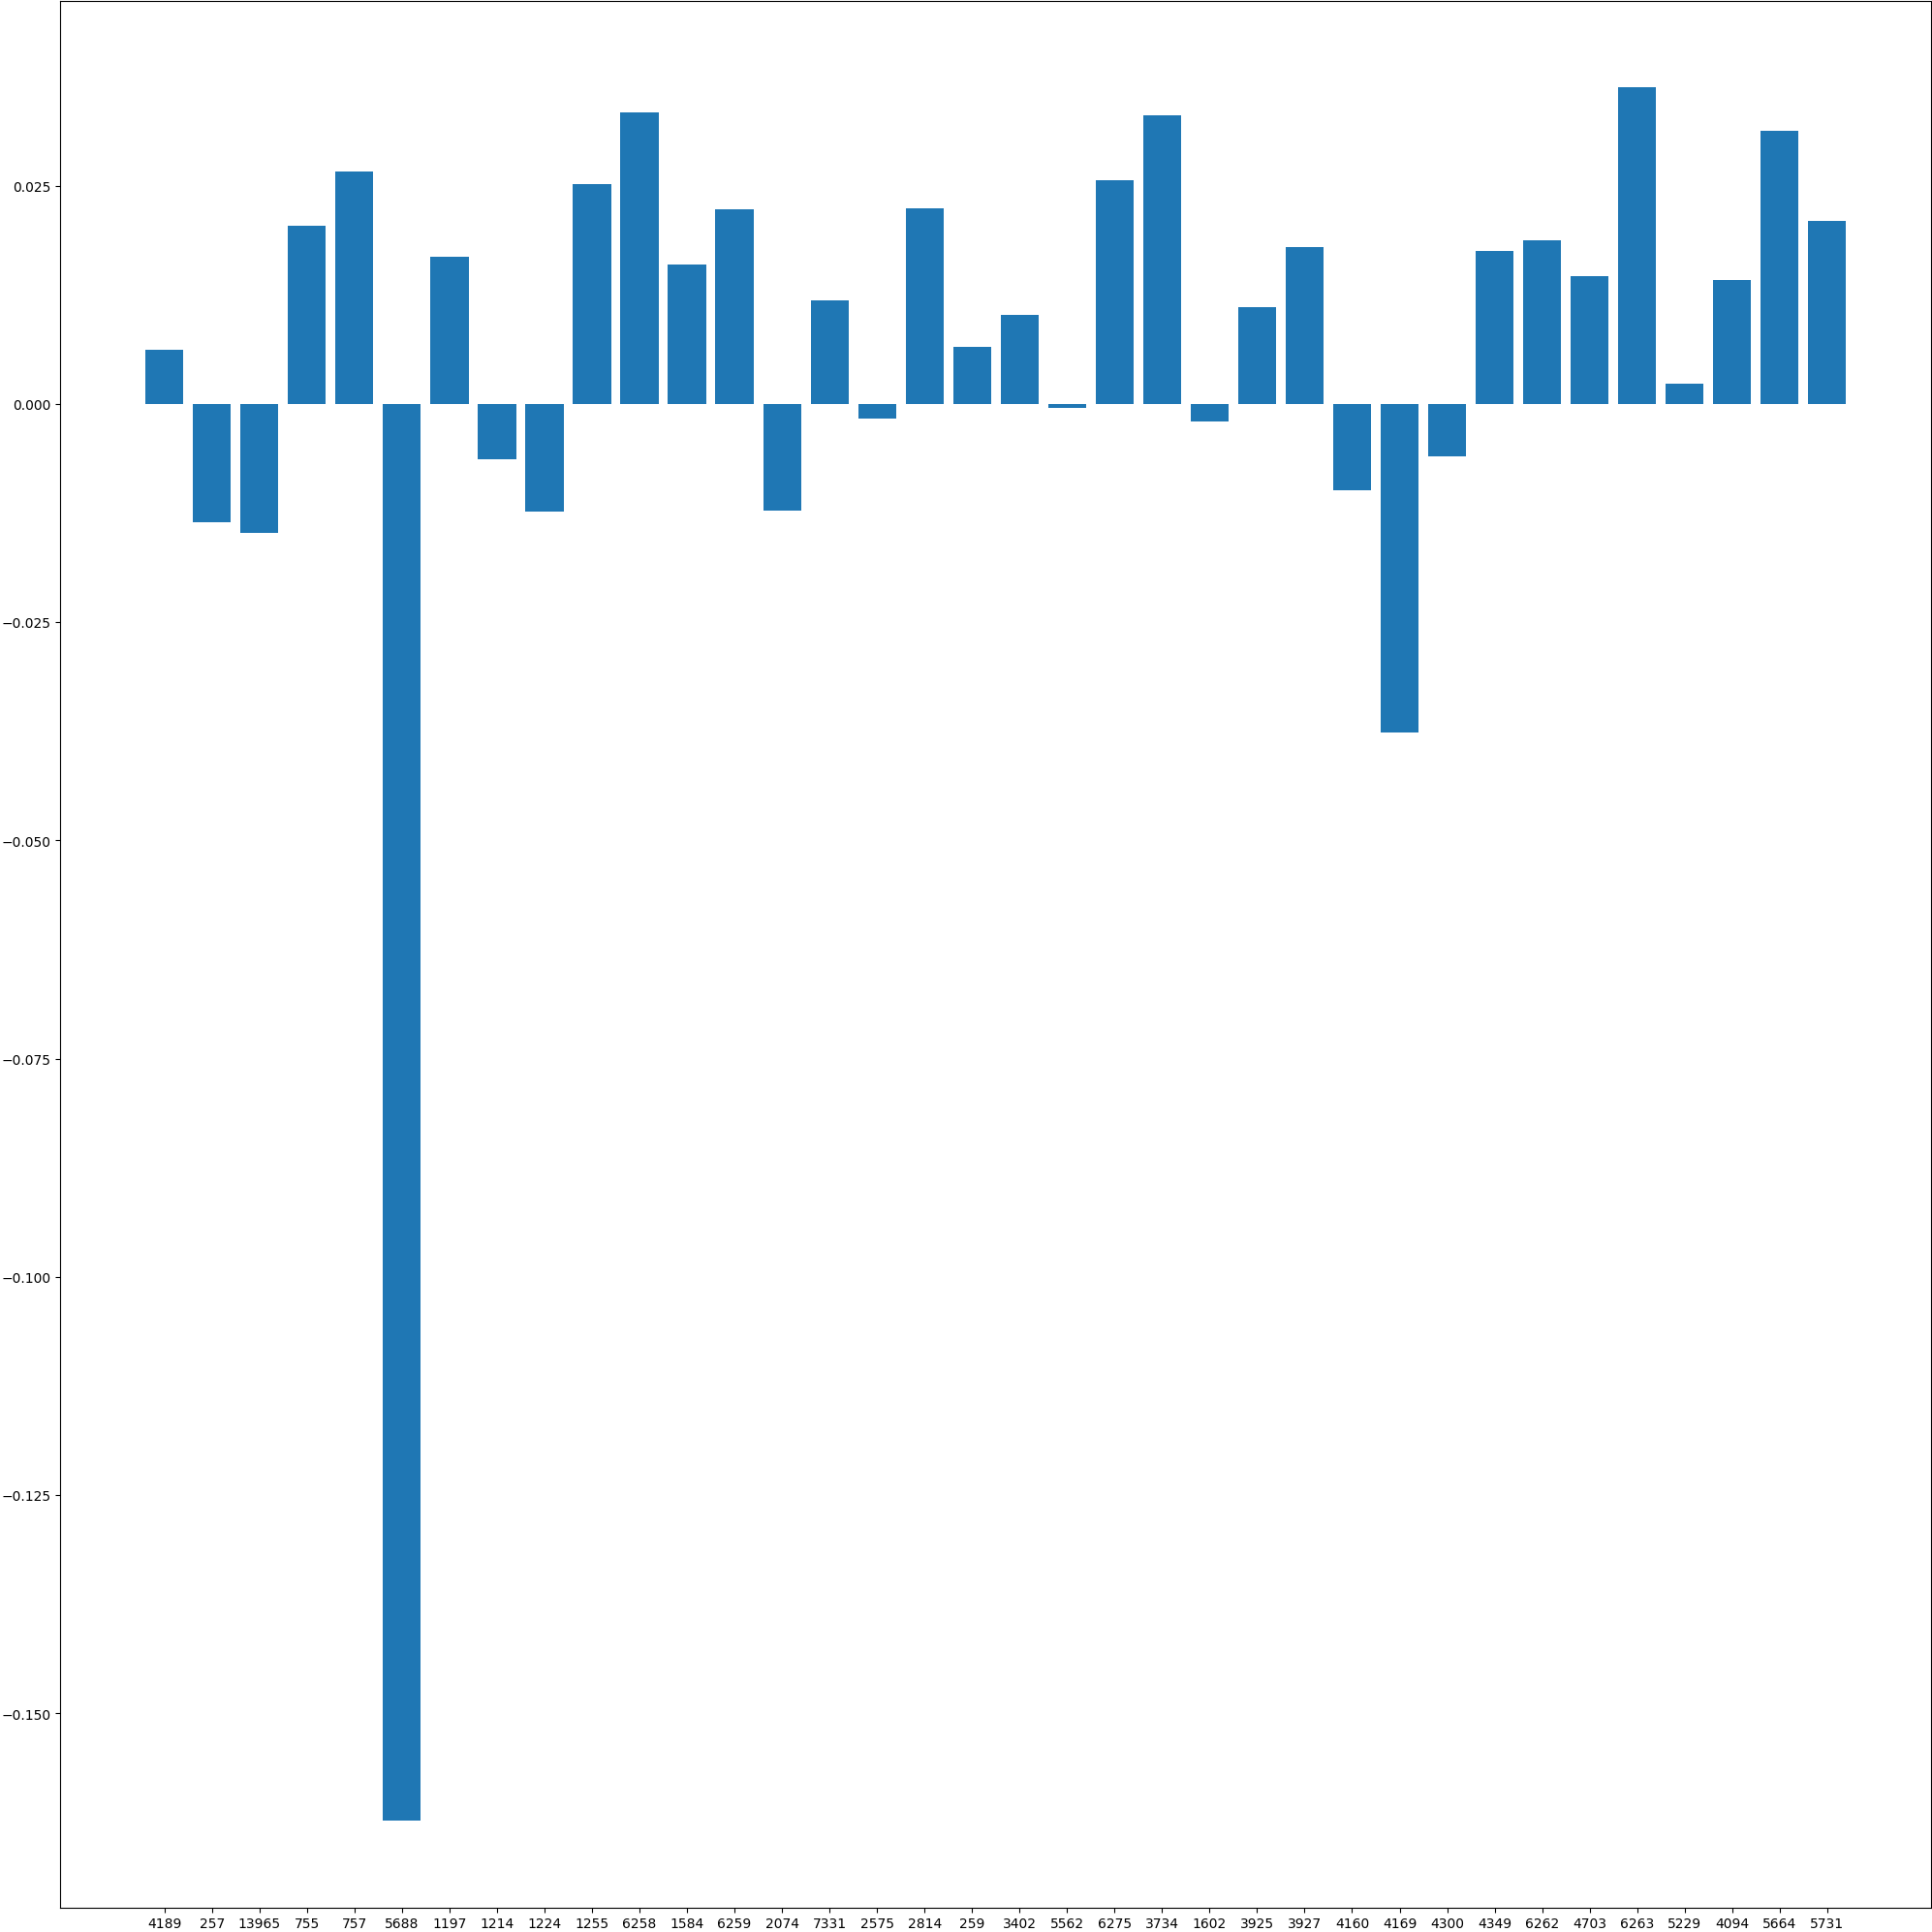

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.bar(
    error_by_station_plz.index,
    error_by_station_plz["precipitation_error"],
    tick_label = error_by_station_plz["station_id"]
)

In [11]:
x_axis_range = np.arange(0,len(error_by_station_plz["station_id"]))

fig, ax = plt.subplots()
ax.scatter(
    error_by_station_plz.index,
    error_by_station_plz["precipitation_error"],
    marker="."
)

ax.set(title = 'Precipitation Difference by Station')
ax.set_xticklabels(error_by_station_plz["Stationsname"].sort_index(), rotation = 45)
print(error_by_station_plz["precipitation_error"].loc[error_by_station_plz["Stationsname"]=="Baden-Baden-Geroldsau"])

NameError: name 'error_by_station_plz' is not defined

Questions remain like: Why is Badeb-Baden-Geroldsau so much less raining than predicted?
How many stations are over predicting? 24  How many stations are underpredicting? 12
Now I try to correlate the stations errors by distance to each other
Can we predict with the neighboring stations the precipitation of the station?
1. Measure the distance of station 1 towards tübingen

In [ ]:
#Precipitation to difference
sorted_by_precipitation_m1 = merge1.sort_values("precipitation_real")
sorted_by_precipitation_m2 = merge2.sort_values("precipitation_real")
sorted_by_precipitation_m2["precipitation_real"]=sorted_by_precipitation_m2["precipitation_real"]/3
sorted_by_precipitation_m2["precipitation_forecast"]=sorted_by_precipitation_m2["precipitation_forecast"]


NameError: name 'merge1' is not defined

In [ ]:
fig, ax = plt.subplots()

#plot sorted values
ax.scatter(sorted_by_precipitation_m1["precipitation_real"],
           sorted_by_precipitation_m1["precipitation_error"],
           c= cmap_color(0.2),
           alpha= 0.05,
           label = "Model 1",
           marker = ".")
ax.scatter(sorted_by_precipitation_m2["precipitation_real"],
           sorted_by_precipitation_m2["precipitation_error"],
           c= cmap_color(0.5),
           alpha= 0.05,
           label="Model 2",
           marker = ".")

#Plot mean
ax.scatter(sorted_by_precipitation_m1["precipitation_real"].mean(),
           sorted_by_precipitation_m1["precipitation_error"].mean(),
             c= cmap_color(0.3),marker = "o")
ax.scatter(sorted_by_precipitation_m2["precipitation_real"].mean(),
           sorted_by_precipitation_m2["precipitation_error"].mean(),
             c= cmap_color(0.6), marker = "o")
ax.set(xlabel = "Precipitation [mm/m^2]",
       ylabel= "Precipitation difference [mm/m^2]",
       title= "Difference of Precipitation and Forecast",
       ylim = (-6,4),
       xlim= (0,4))
#ax.axis('equal')
print("MeanPrecipitation/Precipitation Error for Model 1 (real =",
      sorted_by_precipitation_m1["precipitation_real"].mean() ,
      ", difference by forecast = ",
      sorted_by_precipitation_m1["precipitation_error"].mean(), ")" )
print("MeanPrecipitation/Precipitation Error for Model 2 (real =",
      sorted_by_precipitation_m2["precipitation_real"].mean() ,
      ", difference by forecast = ",
      sorted_by_precipitation_m2["precipitation_error"].mean(), ")" )
plt.rcParams.update()

#Create Legend
eight = mlines.Line2D([], [], color=cmap_color(0.2), marker='.', ls='', label='Model 1')
nine = mlines.Line2D([], [], color=cmap_color(0.5), marker='.', ls='', label='Model 2')
# etc etc
plt.legend(handles=[eight, nine])

NameError: name 'plt' is not defined

In [ ]:
#Accuracy
#Threshold difference> 0.002 mm/m^2
error_by_station_model_1_sorted = merge1.sort_values("station_id")

In [ ]:
error_by_station_model_1_sorted["Accuracy_difference_greater_0.002"]= (error_by_station_model_1_sorted["precipitation_error"]>0.002).astype(int) 
error_by_station_model_1_sorted["Accuracy_difference_greater_0.002"] = error_by_station_model_1_sorted.groupby("station_id").mean()["Accuracy_difference_greater_0.002"]

91305      257
91306      257
91307      257
91308      257
91309      257
         ...  
56417    13965
56402    13965
56403    13965
56420    13965
12313    13965
Name: station_id, Length: 93314, dtype: int64


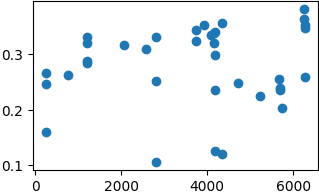

In [ ]:

print(error_by_station_model_1_sorted["station_id"])
fig, ax = plt.subplots()
ax.scatter(
    error_by_station_model_1_sorted["station_id"],
    error_by_station_model_1_sorted["Accuracy_difference_greater_0.002"]
)